In [36]:
import pandas as pd
import zipfile as zip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
with zip.ZipFile('fhvhv_tripdata_2022-12.parquet.zip', 'r') as zip_ref:
    file_name = zip_ref.namelist()[0]
    with zip_ref.open(file_name) as file:
        nyctaxi = pd.read_parquet(file)


In [38]:
trip_counts = nyctaxi['hvfhs_license_num'].value_counts()

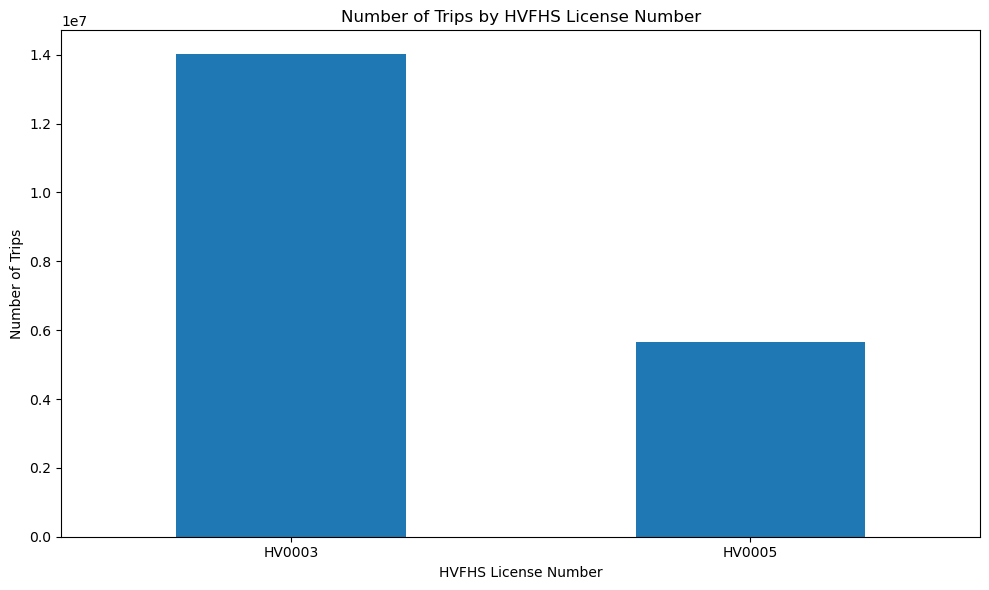

In [39]:
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar')
plt.title('Number of Trips by HVFHS License Number')
plt.xlabel('HVFHS License Number')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
nyctaxi.head(50).to_csv('nyctaxi50.csv', index=False)

In [41]:
nyctaxi_lyft = nyctaxi[nyctaxi['hvfhs_license_num'] == 'HV0005']
nyctaxi_lyft.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0005,B03406,None,2022-12-01 00:11:32,NaT,2022-12-01 00:18:48,2022-12-01 00:41:39,138,140,7.318,...,4.30,2.75,2.5,5.0,24.17,N,N,N,N,N
5,HV0005,B03406,None,2022-12-01 00:02:06,NaT,2022-12-01 00:08:58,2022-12-01 00:19:31,45,234,1.907,...,0.81,2.75,0.0,0.0,7.84,N,N,N,N,N
10,HV0005,B03406,None,2022-12-01 00:01:03,NaT,2022-12-01 00:11:25,2022-12-01 00:22:26,222,39,1.720,...,0.63,0.00,0.0,0.0,7.87,N,N,N,N,N
11,HV0005,B03406,None,2022-12-01 00:21:42,NaT,2022-12-01 00:30:42,2022-12-01 00:44:23,39,72,2.610,...,0.66,0.00,0.0,0.0,10.33,N,N,N,N,N
12,HV0005,B03406,None,2022-12-01 00:54:47,NaT,2022-12-01 00:59:26,2022-12-01 01:05:47,72,188,0.928,...,0.61,0.00,0.0,0.0,5.47,N,N,N,N,N


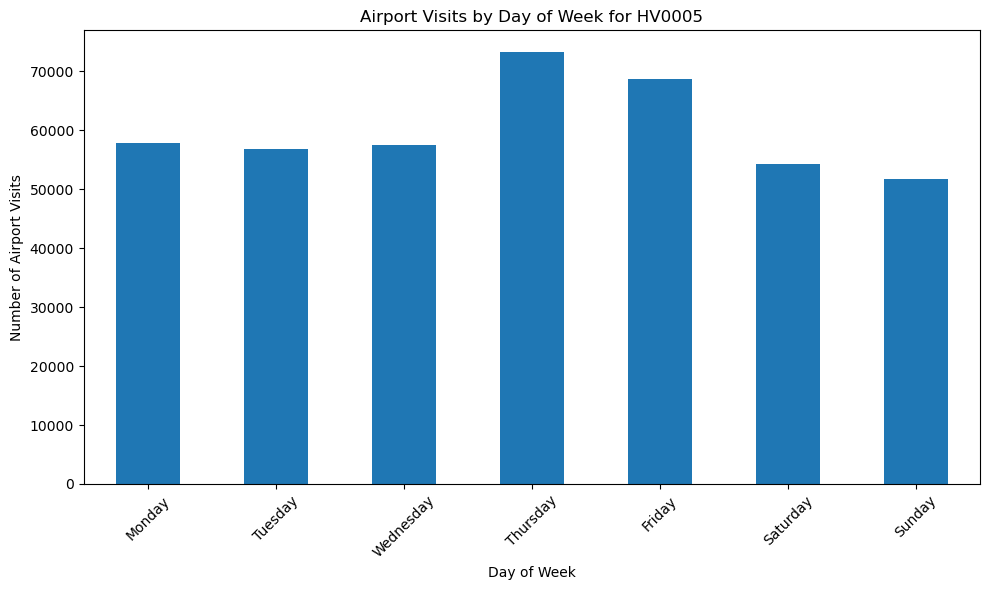

In [42]:
nyctaxi_lyft.loc[:,'airport_visit'] = nyctaxi_lyft['airport_fee'] > 0

nyctaxi_lyft.loc[:,'pickup_datetime'] = pd.to_datetime(nyctaxi_lyft['pickup_datetime'])
nyctaxi_lyft.loc[:,'day_of_week'] = nyctaxi_lyft['pickup_datetime'].dt.day_name()

airport_visits = nyctaxi_lyft.groupby('day_of_week')['airport_visit'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
airport_visits.plot(kind='bar')
plt.title('Airport Visits by Day of Week for HV0005')
plt.xlabel('Day of Week')
plt.ylabel('Number of Airport Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
nyctaxi_lyft.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'airport_visit', 'day_of_week'],
      dtype='object')

In [44]:
nyctaxi_lyft.loc[:,'total_ride_cost'] = (
    nyctaxi_lyft['base_passenger_fare'] + 
    nyctaxi_lyft['tolls'] + 
    nyctaxi_lyft['bcf'] +
    nyctaxi_lyft['sales_tax'] +
    nyctaxi_lyft['congestion_surcharge'] +
    nyctaxi_lyft['airport_fee'] +
    nyctaxi_lyft['tips'] )

avg_cost = nyctaxi_lyft.groupby('hvfhs_license_num')['total_ride_cost'].mean()


In [45]:
nyctaxi_lyft.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,airport_visit,day_of_week,total_ride_cost
0,HV0005,B03406,None,2022-12-01 00:11:32,NaT,2022-12-01 00:18:48,2022-12-01 00:41:39,138,140,7.318,...,5.0,24.17,N,N,N,N,N,True,Thursday,61.99
5,HV0005,B03406,None,2022-12-01 00:02:06,NaT,2022-12-01 00:08:58,2022-12-01 00:19:31,45,234,1.907,...,0.0,7.84,N,N,N,N,N,False,Thursday,12.99
10,HV0005,B03406,None,2022-12-01 00:01:03,NaT,2022-12-01 00:11:25,2022-12-01 00:22:26,222,39,1.720,...,0.0,7.87,N,N,N,N,N,False,Thursday,7.99
11,HV0005,B03406,None,2022-12-01 00:21:42,NaT,2022-12-01 00:30:42,2022-12-01 00:44:23,39,72,2.610,...,0.0,10.33,N,N,N,N,N,False,Thursday,16.65
12,HV0005,B03406,None,2022-12-01 00:54:47,NaT,2022-12-01 00:59:26,2022-12-01 01:05:47,72,188,0.928,...,0.0,5.47,N,N,N,N,N,False,Thursday,7.70


In [46]:
display(nyctaxi_lyft['day_of_week'].value_counts())

day_of_week
Saturday     1067640
Friday        989827
Thursday      913923
Sunday        715406
Wednesday     677559
Tuesday       665594
Monday        627990
Name: count, dtype: int64

In [47]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late night'
nyctaxi_lyft['pickup_datetime'] = pd.to_datetime(nyctaxi_lyft['pickup_datetime'])
nyctaxi_lyft['dropoff_datetime'] = pd.to_datetime(nyctaxi_lyft['dropoff_datetime'])

nyctaxi_lyft['pickup_hour'] = nyctaxi_lyft['pickup_datetime'].dt.hour
nyctaxi_lyft['dropoff_hour'] = nyctaxi_lyft['dropoff_datetime'].dt.hour

nyctaxi_lyft['pickup_timeday'] = nyctaxi_lyft['pickup_hour'].apply(time_of_day)
nyctaxi_lyft['dropoff_timeday'] = nyctaxi_lyft['dropoff_hour'].apply(time_of_day)

Text(0.5, 0, 'Drop Off Hour')

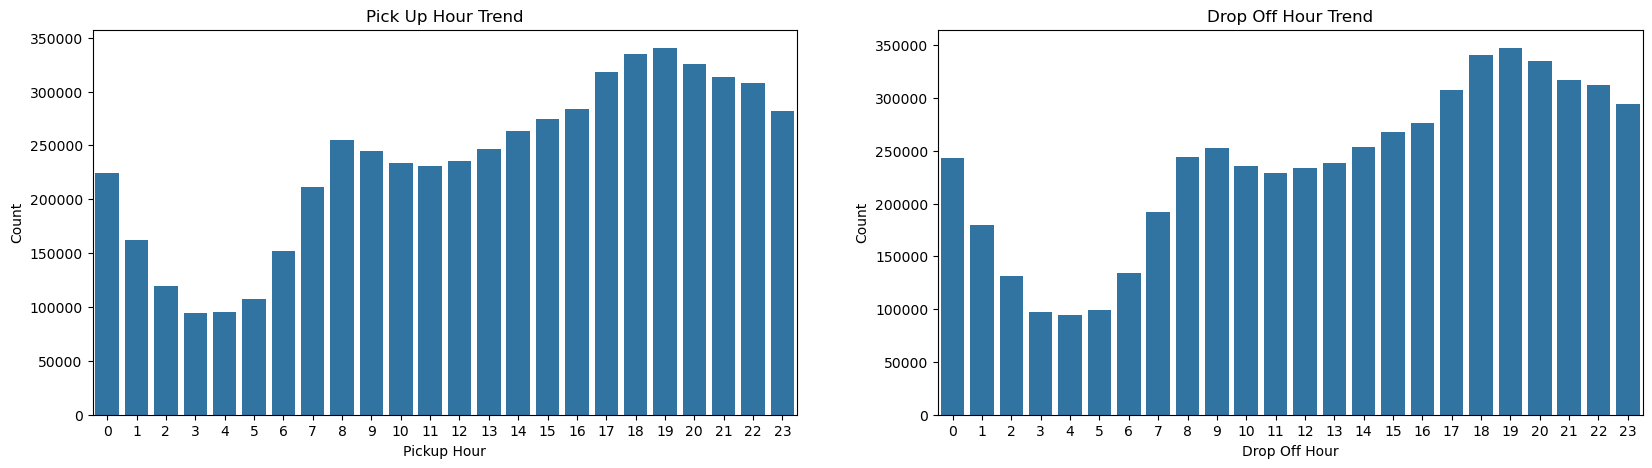

In [48]:
figure, (ax9, ax10) = plt.subplots(ncols=2, figsize=(20,5))

ax9.set_title('Pick Up Hour Trend')
sns.countplot(x="pickup_hour", data=nyctaxi_lyft, ax=ax9)
ax9.set_ylabel('Count')
ax9.set_xlabel('Pickup Hour')

ax10.set_title('Drop Off Hour Trend')
sns.countplot(x="dropoff_hour", data=nyctaxi_lyft, ax=ax10)
ax10.set_ylabel('Count')
ax10.set_xlabel('Drop Off Hour')

In [49]:
nyctaxi_lyft.drop(columns=['dispatching_base_num', 'originating_base_num', 'request_datetime', 'on_scene_datetime','trip_miles', 'trip_time', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips'], inplace=True)

In [50]:
nyctaxi_lyft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5657939 entries, 0 to 19665831
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   hvfhs_license_num    object        
 1   pickup_datetime      datetime64[us]
 2   dropoff_datetime     datetime64[us]
 3   PULocationID         int64         
 4   DOLocationID         int64         
 5   driver_pay           float64       
 6   shared_request_flag  object        
 7   airport_visit        bool          
 8   day_of_week          object        
 9   total_ride_cost      float64       
 10  pickup_hour          int32         
 11  dropoff_hour         int32         
 12  pickup_timeday       object        
 13  dropoff_timeday      object        
dtypes: bool(1), datetime64[us](2), float64(2), int32(2), int64(2), object(5)
memory usage: 566.6+ MB
